In [22]:
# Alex Zhang 512910

In [23]:
#1. The outcome is the sales numbers of the frozen drink (in dollars)

In [24]:
#2. The main effect/predictor that she wants to understand the impact of is the daily temperatures (in degress Fahrenheit).

In [25]:
#3. H0: The daily temperatures (in degress Fahrenheit) do not
#       have significant impact on the sales numbers of the frozen drink (in dollars)
#   H1: The daily temperatures (in degress Fahrenheit) 
#       have significant impact on the sales numbers of the frozen drink (in dollars). The sales are higher on hotter days.

In [26]:
#7. The analysis is being conducted to test whether there is a statistical basis that hotter days lead to higher sales.

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [28]:
df = pd.read_excel('drinks.xlsx')
df 

,Temperature_F,Sales
0,75,3140.0
1,63,2448.0
2,85,2970.0
3,82,2728.0
4,66,2102.0
...,...,...
175,72,2556.0
176,72,2616.0
177,91,3415.0
178,94,3469.0


In [29]:
summary = df.describe()
summary

,Temperature_F,Sales
count,180.000000,178.000000
mean,79.305556,2936.382022
std,10.375679,399.343812
min,57.000000,1959.000000
25%,71.750000,2652.500000
50%,79.000000,2955.500000
75%,87.000000,3199.750000
max,105.000000,3971.000000


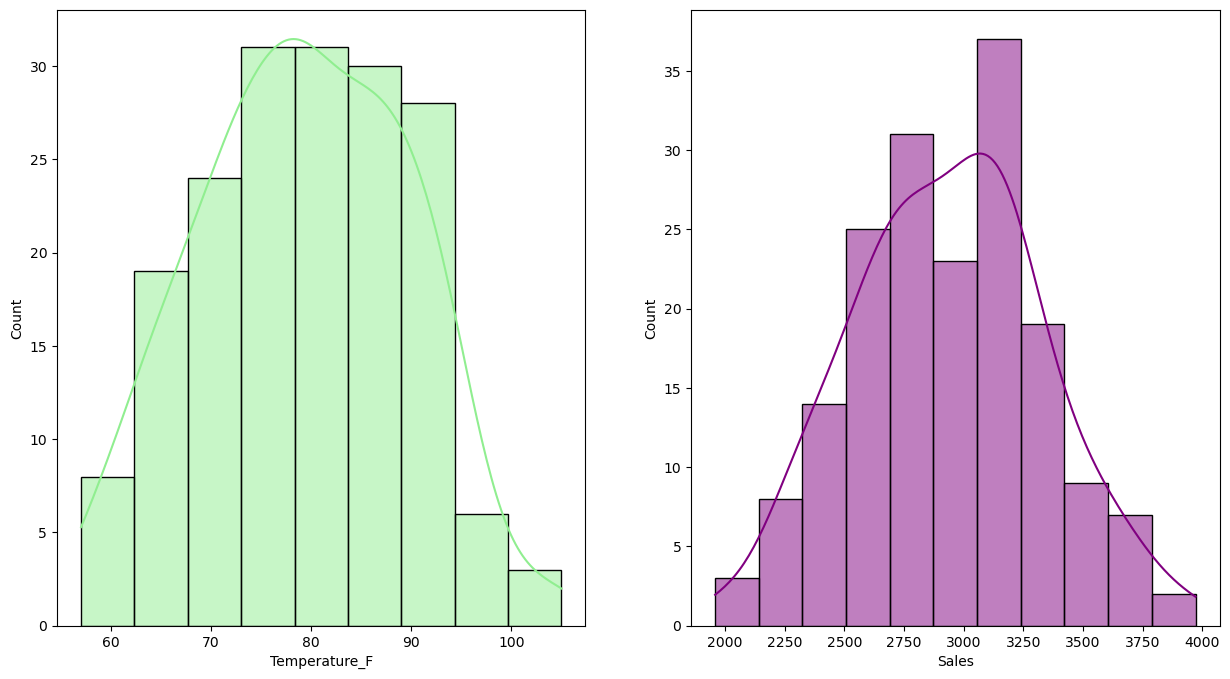

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(df['Temperature_F'], color="lightgreen", kde=True, ax=axs[0])
sns.histplot(df['Sales'], color="purple", kde=True, ax=axs[1])

plt.show()

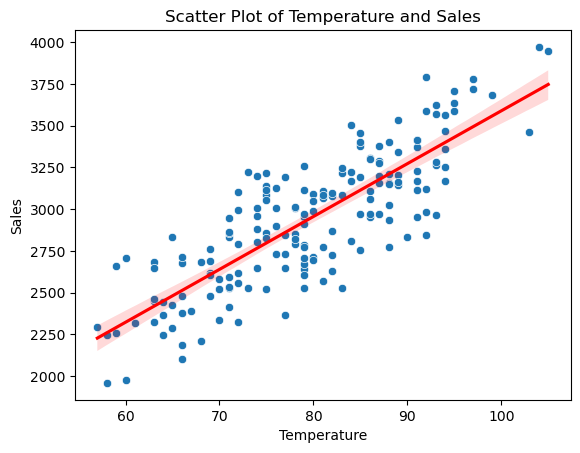

In [31]:
sns.scatterplot(x='Temperature_F', y='Sales', data=df)


sns.regplot(x='Temperature_F', y='Sales', data=df, scatter=False, color='red')

plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Scatter Plot of Temperature and Sales')
plt.show()

In [32]:
correlation = df['Temperature_F'].corr(df['Sales'])
correlation

0.8230462394468031

In [33]:
df.corr()

,Temperature_F,Sales
Temperature_F,1.000000,0.823046
Sales,0.823046,1.000000


In [35]:
df2 = df.dropna(subset=['Sales'])
X = df2['Temperature_F']
Y = df2['Sales']


X = sm.add_constant(X)
model_clean = sm.OLS(Y, X).fit()

model_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           4.21e-45
Time:                        07:25:04   Log-Likelihood:                -1217.6
No. Observations:                 178   AIC:                             2439.
Df Residuals:                     176   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           423.2649    131.833      3.211      0.002     163.088     683.441
Temperature_F    31.6496      1.646     19.224      0.000      28.400      34.899
==============================================================================
Omnibus:                        7.647   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.999
Skew:                          -0.127   Prob(JB):                        0.135
Kurtosis:                       2.311   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#11. The coefficient for Temperature_F is positive, 
#    meaning that for every unit of the temperature increase, sales are expected to increase. 
#    Specifically, for each extra unit rise in temperature, 
#    sales are predicted to increase by about $31.65.
##     R-squared is 0.677, indicating that the model explains approximately 67.7% of the variability in sales.
### Generally, the result shows that the change in temperatures
### has a siginificant impact on the sales numbers of the frozen drink (in dollars) since p-value < 0.05.

In [37]:
# I used:
# https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22
# as the source to find the regression coefficients (bs) for the frozen custard data in Section 1.

Learning Rate 0.1:
Coefficients: [nan nan]

Learning Rate 0.01:
Coefficients: [nan nan]

Learning Rate 0.001:
Coefficients: [nan nan]



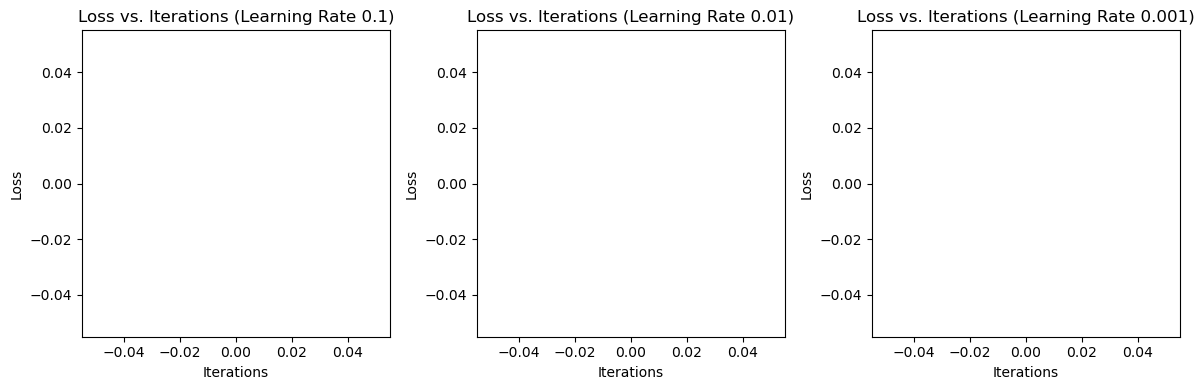

In [39]:
x = df['Temperature_F'].values
y = df['Sales'].values

x_normalized = (x - np.mean(x)) / np.std(x)

X = np.vstack((np.ones(len(x_normalized)), x_normalized)).T

learning_rates = [0.1, 0.01, 0.001]
iterations = 1000

def computeCost(X, Y, theta):
    m = len(Y)
    diff = np.matmul(X, theta) - Y
    J = 1 / (2 * m) * np.matmul(diff, diff)
    return J

def gradientDescent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    J_history = []

    for i in range(num_iters):
        hc = np.matmul(X, theta) - Y
        theta -= alpha / m * np.matmul(X.T, hc)
        J_history.append(computeCost(X, Y, theta))

    return theta, J_history

loss_history_dict = {}

for lr in learning_rates:
    theta = np.zeros(2)
    theta_final, J_history = gradientDescent(X, y, theta, lr, iterations)
    loss_history_dict[lr] = J_history
    print(f"Learning Rate {lr}:")
    print(f"Coefficients: {theta_final}")
    print()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, lr in enumerate(learning_rates):
    axes[i].scatter(range(iterations), loss_history_dict[lr], s=10, label=f'Learning Rate {lr}')
    axes[i].set_xlabel("Iterations")
    axes[i].set_ylabel("Loss")
    axes[i].set_title(f"Loss vs. Iterations (Learning Rate {lr})")
    
plt.tight_layout()
plt.show()

In [40]:
df['Temperature_F'] = (df['Temperature_F'] - df['Temperature_F'].mean()) / df['Temperature_F'].std()
df['Sales'] = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()

X = df[['Temperature_F']].to_numpy()
Y = df[['Sales']].to_numpy()

X = np.hstack((np.ones((X.shape[0], 1)), X))

X[:10], Y[:10]

(array([[ 1.        , -0.41496614],
        [ 1.        , -1.57151694],
        [ 1.        ,  0.54882619],
        [ 1.        ,  0.25968849],
        [ 1.        , -1.28237924],
        [ 1.        ,  0.35606772],
        [ 1.        , -0.51134538],
        [ 1.        , -1.37875848],
        [ 1.        , -0.02944921],
        [ 1.        , -1.57151694]]),
 array([[ 0.50988139],
        [-1.22296129],
        [ 0.08418304],
        [-0.52181107],
        [-2.08938262],
        [ 0.36965135],
        [        nan],
        [-0.26138385],
        [ 0.04411732],
        [-1.18289556]]))

In [49]:
df.dropna(inplace=True)

z_scores = np.abs((df - df.mean()) / df.std())
df = df[(z_scores < 3).all(axis=1)]

X_standardized = (df['Temperature_F'] - df['Temperature_F'].mean()) / df['Temperature_F'].std()
Y_standardized = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()

def gradient_descent(X, Y, learning_rate, epochs):
    b0 = 0.0
    b1 = 0.0

    for _ in range(epochs):
        Y_pred = b0 + b1 * X
        gradient_b0 = -2 * np.mean(Y - Y_pred)
        gradient_b1 = -2 * np.mean(X * (Y - Y_pred))
        b0 -= learning_rate * gradient_b0
        b1 -= learning_rate * gradient_b1
        
    return b0, b1

learning_rates = [0.01, 0.001]
epochs = 1000

results_gradient_descent = {}

for learning_rate in learning_rates:
    b0, b1 = gradient_descent(X_standardized, Y_standardized, learning_rate, epochs)
    Y_pred = b0 + b1 * X_standardized
    r_squared = r2_score(Y_standardized, Y_pred)
    results_gradient_descent[learning_rate] = {
        "Intercept": b0,
        "Coefficient for X": b1,
        "R-squared": r_squared
    }

for learning_rate, result in results_gradient_descent.items():
    print(f"Results using Gradient Descent (Learning Rate: {learning_rate}):")
    print(result)


Results using Gradient Descent (Learning Rate: 0.01):
{'Intercept': -1.6715717449412462e-17, 'Coefficient for X': 0.8230462378933789, 'R-squared': 0.6774051122675243}
Results using Gradient Descent (Learning Rate: 0.001):
{'Intercept': -2.754351054350952e-18, 'Coefficient for X': 0.7106232868660521, 'R-squared': 0.6647661920005505}


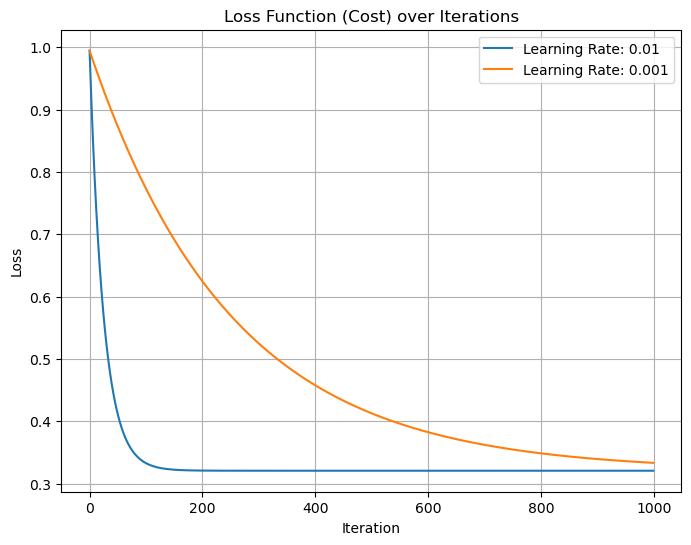

In [50]:
def gradient_descent(X, Y, learning_rate, epochs):
    b0 = 0.0 
    b1 = 0.0
    loss_history = []

    for _ in range(epochs):
        Y_pred = b0 + b1 * X
        gradient_b0 = -2 * np.mean(Y - Y_pred)
        gradient_b1 = -2 * np.mean(X * (Y - Y_pred))
        b0 -= learning_rate * gradient_b0
        b1 -= learning_rate * gradient_b1
        
        loss = np.mean((Y - Y_pred) ** 2)
        loss_history.append(loss)

    return b0, b1, loss_history

learning_rates = [0.01, 0.001]
epochs = 1000

results_gradient_descent = {}
losses = {}

for learning_rate in learning_rates:
    b0, b1, loss_history = gradient_descent(X_standardized, Y_standardized, learning_rate, epochs)
    Y_pred = b0 + b1 * X_standardized
    r_squared = r2_score(Y_standardized, Y_pred)
    results_gradient_descent[learning_rate] = {
        "Intercept": b0,
        "Coefficient for X": b1,
        "R-squared": r_squared
    }
    losses[learning_rate] = loss_history

plt.figure(figsize=(8, 6))
for learning_rate, loss_history in losses.items():
    plt.plot(range(epochs), loss_history, label=f"Learning Rate: {learning_rate}")
    
plt.title("Loss Function (Cost) over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()